In [4]:
import pandas as pd

df = pd.read_csv("../Data/chess_numeric.csv", index_col=0)
df.columns

Index(['event', 'result', 'white_elo', 'white_rating_diff', 'black_elo',
       'black_rating_diff', 'winner_loser_elo_diff', 'eco', 'termination',
       'variant', 'ply_count'],
      dtype='object')

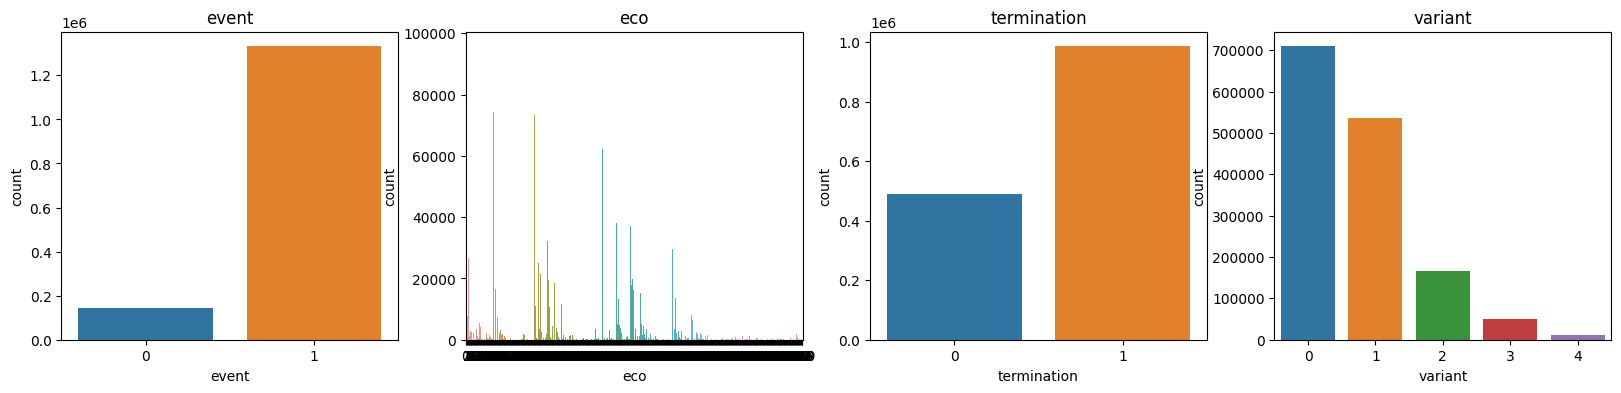

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['event','eco',"termination","variant"]
numerical = cols
plt.figure(figsize=(20,4))
for i, col in enumerate(numerical):
	ax = plt.subplot(1, len(numerical), i+1)
	sns.countplot(x=str(col), data=df)
	ax.set_title(f"{col}")

<Axes: xlabel='winner_loser_elo_diff', ylabel='result'>

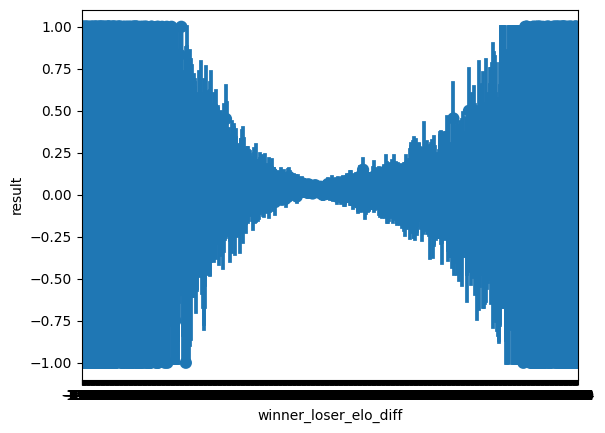

In [22]:
sns.pointplot(x='winner_loser_elo_diff', y='result', data=df)

<Axes: xlabel='winner_loser_elo_diff', ylabel='ply_count'>

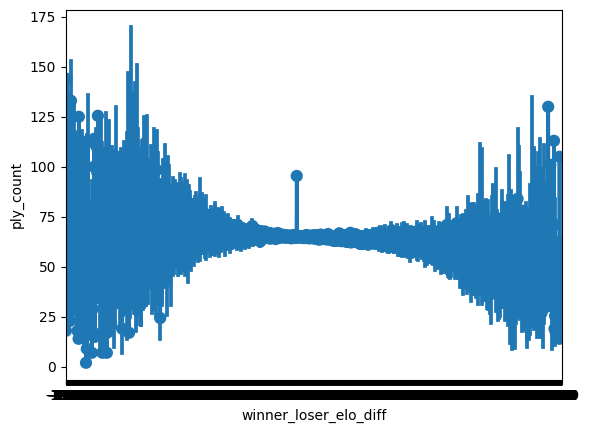

In [23]:
sns.pointplot(x='winner_loser_elo_diff', y='ply_count', data=df)

In [24]:
from sklearn.model_selection import train_test_split
finaldf = df.dropna()
X = finaldf.drop(['result', 'white_rating_diff', 'black_rating_diff', 'winner_loser_elo_diff'],axis=1)
y = finaldf['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

In [25]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

y_train.value_counts()

result
-1    495470
 0    495470
 1    495470
Name: count, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [27]:
from sklearn.metrics import accuracy_score
preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.6842376677007787
